0
10
20
30
40
50
60
70
80
90


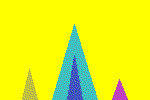

In [1]:
from dataclasses import dataclass

import numpy as np
from IPython.display import Image as Im
from PIL import Image, ImageDraw

frames = 100

color_bg = "#00AF50"
color_spire = "#81007F"
color_lightning = "#FFFF00"

h = 100
w = 150

@dataclass
class Spire():
    spire_height: float = 0.75
    spire_base_width: float = 0.5
    spire_base_center: float = 0.5
    base_wiggle: float = 1
    x_wiggle: float = 1
    y_wiggle: float = 1
    width: int = w
    height: int = h

    def polygon(self):
        spire_base_width_new = self.spire_base_width + self.base_wiggle * self.spire_base_width * 0.25
        base_0 = ((self.spire_base_center - spire_base_width_new / 2) * self.width,
                  0)
        base_1 = ((self.spire_base_center + spire_base_width_new / 2) * self.width,
                  0)
        wiggle_x = self.x_wiggle * 50
        wiggle_y = self.y_wiggle * 25

        top = (self.spire_base_center * self.width + wiggle_x,
               self.spire_height * self.height + wiggle_y)
        return [base_0, top, base_1]


@dataclass
class Lightning():
    lightning_length: float = 0.3
    lightning_angle: float = 45
    lightning_zigs: int = 7
    lightning_base_width: float = 0.25
    lightning_start_horizontal: float = 0.75
    width: int = w
    height: int = h

    def polygon(self):
        l_center = self.lightning_start_horizontal * self.width
        l_base_w = self.lightning_base_width * self.width
        l_poly = []
        l = self.lightning_length * (sin_N5 + 1)

        for z in range(self.lightning_zigs, 0, -1):
            x, y = l_center - (
                l_base_w / 2
            ) * z / self.lightning_zigs, z * l * self.height / self.lightning_zigs
            l_poly.append((x, self.height - y))
            l_poly.append((x + 10, self.height - y))
        for z in range(self.lightning_zigs):
            x, y = l_center + (l_base_w / 2) * (z - 1) / self.lightning_zigs, (
                z - 1) * l * self.height / self.lightning_zigs
            l_poly.append((x, self.height - y))
            l_poly.append((x - 10, self.height - y))
        return l_poly


images = []

for i in range(0, frames):
    N = (i / frames)
    sin_N = np.sin(2 * N * 2 * np.pi)
    sin_N3 = np.sin(2 * 3 * N * 2 * np.pi)
    sin_N5 = np.sin(7 * N * 2 * np.pi)

    if (i % 2 == 0 and i % 5 == 0):
        color = color_lightning
        print (i)
    else:
        color = color_bg

    im = Image.new('RGB', (w, h), color)
    draw = ImageDraw.Draw(im)

    s = Spire(base_wiggle=sin_N,
              x_wiggle=sin_N3,
              y_wiggle=sin_N5*0.75,
              spire_base_width=0.3,
              spire_base_center=0.5 + sin_N/10)
    hue = int(360 * (sin_N + 1) / 2)

    draw.polygon(s.polygon(), fill=f"hsl({hue}, 50%, 50%)")

    s = Spire(base_wiggle=sin_N,
              x_wiggle=sin_N3,
              y_wiggle=sin_N5*0.6,
              spire_base_center=0.2,
              spire_height=0.2,
              spire_base_width=0.1)
    draw.polygon(s.polygon(), fill=f"hsl({(hue+120)%360}, 50%, 50%)")

    s = Spire(base_wiggle=sin_N,
              x_wiggle=sin_N5,
              y_wiggle=sin_N3*0.9,
              spire_base_center=0.8,
              spire_height=0.3,
              spire_base_width=0.1)
    draw.polygon(s.polygon(), fill=f"hsl({(hue+240)%360}, 50%, 50%)")

    s = Spire(base_wiggle=sin_N,
              x_wiggle=sin_N5,
              y_wiggle=sin_N*0.5,
              spire_base_center=(sin_N + 1)/2,
              spire_height=0.3 + 0.3 * (sin_N3*sin_N5 + 1)/2,
              spire_base_width=0.1)
    draw.polygon(s.polygon(), fill=f"hsl({(hue+50)%360}, 50%, 50%)")

    l = Lightning()
    if sin_N5 > 0 and sin_N > 0:
        draw.polygon(l.polygon(), fill=color_lightning)
    images.append(im.rotate(180))

    l = Lightning(lightning_base_width=0.1,
                  lightning_start_horizontal=0.1,
                  lightning_zigs=3,
                  lightning_length=1.2)
    if sin_N5 > 0:
        draw.polygon(l.polygon(), fill=color_lightning)
    images.append(im.rotate(180))

    l = Lightning(lightning_base_width=0.1,
                  lightning_start_horizontal=(sin_N3 + 1)/2,
                  lightning_zigs=15,
                  lightning_length=0.4)
    if sin_N3 > 0:
        draw.polygon(l.polygon(), fill=color_lightning)
    images.append(im.rotate(180))

file_name = "spire_dance.gif"
images[0].save(file_name,
               save_all=True,
               append_images=images[1:],
               optimize=True,
               duration=33,
               loop=0)

Im(filename=file_name)